In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

In [3]:
t=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train_data=CIFAR10(root='.\cifar', train=True, download=True, transform=t)
test_data=CIFAR10(root='.\cifar', train=False,download=True,transform=t)

train_loader=DataLoader(train_data,batch_size=32,shuffle=True)
test_loader=DataLoader(test_data,batch_size=32,shuffle=False)

100%|██████████| 170M/170M [00:05<00:00, 29.8MB/s]


Extracting .\cifar/cifar-10-python.tar.gz to .\cifar
Files already downloaded and verified


In [8]:
class cnn_model(nn.Module):
  def __init__(self):
    super(cnn_model,self).__init__()
    self.conv1=nn.Conv2d(3,32,3,padding=1)
    self.conv2=nn.Conv2d(32,64,3,padding=1)
    self.conv3=nn.Conv2d(64,128,3,padding=1)
    self.fc1=nn.Linear(128*4*4,256)
    self.fc2=nn.Linear(256,128)
    self.fc3=nn.Linear(128,10)
    self.pool=nn.MaxPool2d(2,2)

  def forward(self,x):
    x=self.conv1(x)
    x=F.relu(x)
    x=self.pool(x)
    x=self.pool(F.relu(self.conv2(x)))
    x=self.pool(F.relu(self.conv3(x)))
    x=x.view(-1,128*4*4)
    x=torch.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [11]:
model=cnn_model()
criteria=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)

num_epochs=10
for epoch in range(num_epochs):
  running_loss=0.0
  for image,label in train_loader:
    output=model(image)
    loss=criteria(output,label)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    running_loss+=loss.item()

  print(f'epoch[{epoch+1/num_epochs}],loss:{running_loss/len(train_loader)}')

epoch[0.1],loss:1.684907764101059
epoch[1.1],loss:1.3901053801684218
epoch[2.1],loss:1.2756761816626394
epoch[3.1],loss:1.1821902236416792
epoch[4.1],loss:1.0934027893300706
epoch[5.1],loss:1.0201100636504814
epoch[6.1],loss:0.9539005440622282
epoch[7.1],loss:0.8954669858733584
epoch[8.1],loss:0.8439897701134684
epoch[9.1],loss:0.8010573981476379


epoch[9.1],loss:0.9777385322847811
accuracy:69.11


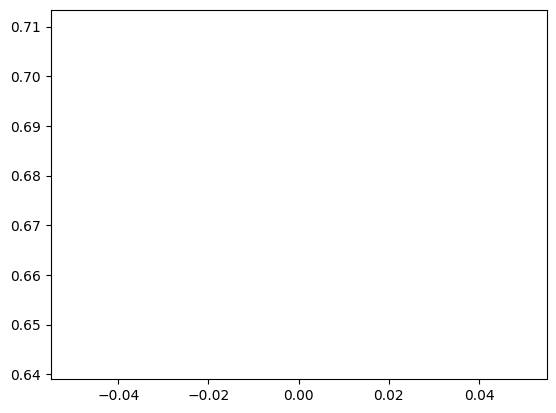

In [12]:
model.eval()
correct=0.0
total=0.0
with torch.no_grad():
  for img,label in test_loader:
    output=model(img)
    loss=criteria(output,label)
    _,predicted=torch.max(output,1)
    correct+=(predicted==label).sum().item()
    total+=label.size(0)
    running_loss+=loss.item()
  print(f'epoch[{epoch+1/num_epochs}],loss:{running_loss/len(train_loader)}')
  print(f'accuracy:{(correct/total)*100}')

plt.plot(loss)
plt.show()
